#### ADASYN = Adaptive Synthetic Sampling

👉 It is an oversampling technique 
👉 It creates new synthetic data points for the minority class
👉 But smartly, not randomly

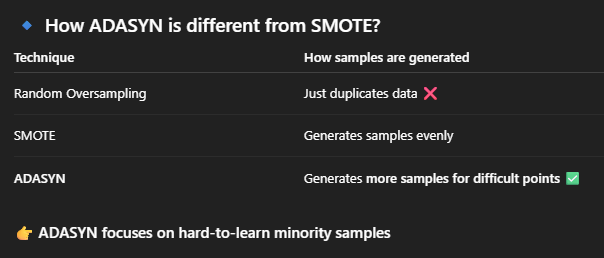

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
from collections import Counter
from imblearn.over_sampling import ADASYN

In [4]:
# ===== LOAD DATASET =====
# Update path if needed
df = pd.read_csv("../mid-data/preprocessed.csv")

# ===== TARGET & FEATURES =====
target_col = 'Churn'

X = df.drop(columns=[target_col])
y = df[target_col]

In [5]:
# ===== BEFORE ADASYN =====
print("BEFORE ADASYN")
print("Total instances:", len(df))
print("Class distribution:", Counter(y))
print("-" * 50)

# ===== APPLY ADASYN =====
adasyn = ADASYN(
    sampling_strategy='auto',
    random_state=42,
    n_neighbors=5
)

X_resampled, y_resampled = adasyn.fit_resample(X, y)

# ===== AFTER ADASYN =====
print("AFTER ADASYN")
print("Total instances:", len(y_resampled))
print("Class distribution:", Counter(y_resampled))
print("-" * 50)

# ===== CREATE FINAL DATAFRAME =====
df_balanced = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns),
     pd.Series(y_resampled, name=target_col)],
    axis=1
)

BEFORE ADASYN
Total instances: 7043
Class distribution: Counter({0: 5174, 1: 1869})
--------------------------------------------------
AFTER ADASYN
Total instances: 10410
Class distribution: Counter({1: 5236, 0: 5174})
--------------------------------------------------


In [9]:
# ===== SAVE DATASET =====
output_dir = "../mid-data"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "adasyn_balanced.csv")
df_balanced.to_csv(output_path, index=False)

print(f"Balanced dataset saved at: {output_path}")

Balanced dataset saved at: ../mid-data\adasyn_balanced.csv
